# Task 1

Load and configure the needed modules.

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD
from keras.utils import np_utils

# inline plots
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'

Using Theano backend.


Load the MNIST data, shuffled and split between train and test sets. Additionally, we are going to take 10% of the entire training set as the validation set and leave the remaining 90% as the training set.

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

num_validation = int(X_train.shape[0] * 0.1)
num_training = X_train.shape[0] - num_validation

mask = range(num_training, num_training + num_validation)
X_val = X_train[mask]
y_val = y_train[mask]

mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

print 'X_train: ', X_train.shape
print 'y_train: ', y_train.shape
print 'X_val: ', X_val.shape
print 'y_val: ', y_val.shape
print 'X_test: ', X_test.shape
print 'y_test: ', y_test.shape

X_train:  (54000L, 28L, 28L)
y_train:  (54000L,)
X_val:  (6000L, 28L, 28L)
y_val:  (6000L,)
X_test:  (10000L, 28L, 28L)
y_test:  (10000L,)


## Fully Connected Neural Network

We need to reshape the images into vectors, convert the pixel values to float numbers and divide by 255 so that the values are between 0 and 1.

In [3]:
X_train_fc = X_train.reshape(X_train.shape[0], -1).astype('float32') / 255
X_val_fc = X_val.reshape(X_val.shape[0], -1).astype('float32') / 255
X_test_fc = X_test.reshape(X_test.shape[0], -1).astype('float32') / 255

We also need to convert the class labels to binary vectors. See below a couple of examples of what this means.

In [4]:
nb_classes = 10
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_val = np_utils.to_categorical(y_val, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

print 'Class label: {0} -> Binary vector: {1}'.format(y_train[0], Y_train[0])
print 'Class label: {0} -> Binary vector: {1}'.format(y_train[1], Y_train[1])

Class label: 5 -> Binary vector: [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
Class label: 0 -> Binary vector: [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


First let's try with a simple architecture consisting of two fully connected layers with 32 neurons followed by relu activations, and a third fully connected layer with 10 neurons followed by a softmax function to produce the class scores.

In [5]:
model = Sequential()
model.add(Dense(32, input_dim=X_train_fc.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
          
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 32)            25120       dense_input_1[0][0]              
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 32)            1056        dense_1[0][0]                    
____________________________________________________________________________________________________
dense_3 (Dense)                  (None, 10)            330         dense_2[0][0]                    
Total params: 26506
____________________________________________________________________________________________________


As we can see, this model has 26506 parameters in total. For each layer, the number of parameters is given by the following formula: (input_dim * output_dim) + output_dim. This is because each neuron is connected to all the input values and has one more weight that accounts for the bias.

Next, we are going to train this model and visualise the learning curves.

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 1s - loss: 0.3591 - acc: 0.8878 - val_loss: 0.1442 - val_acc: 0.9542
Epoch 2/20
54000/54000 [==============================] - 1s - loss: 0.1839 - acc: 0.9445 - val_loss: 0.1425 - val_acc: 0.9615
Epoch 3/20
54000/54000 [==============================] - 1s - loss: 0.1570 - acc: 0.9524 - val_loss: 0.1263 - val_acc: 0.9642
Epoch 4/20
54000/54000 [==============================] - 1s - loss: 0.1317 - acc: 0.9610 - val_loss: 0.1215 - val_acc: 0.9660
Epoch 5/20
54000/54000 [==============================] - 1s - loss: 0.1206 - acc: 0.9636 - val_loss: 0.1306 - val_acc: 0.9667
Epoch 6/20
54000/54000 [==============================] - 1s - loss: 0.1109 - acc: 0.9663 - val_loss: 0.1228 - val_acc: 0.9655
Epoch 7/20
54000/54000 [==============================] - 1s - loss: 0.1012 - acc: 0.9693 - val_loss: 0.1211 - val_acc: 0.9670
Epoch 8/20
54000/54000 [==============================] - 2s -

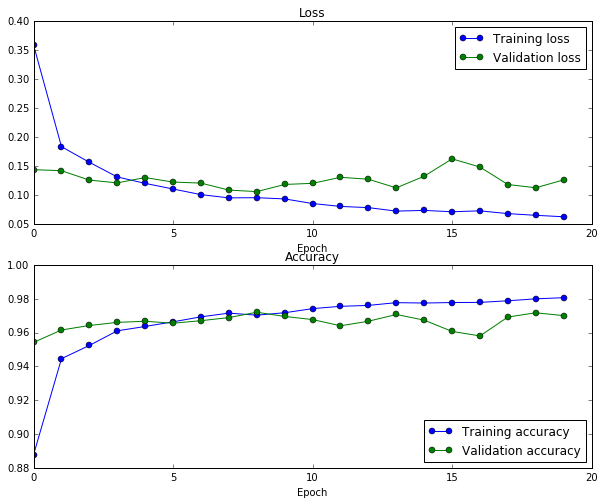

In [6]:
# hyperparameters
lr = 0.1
momemtum = 0.9
batch_size = 128
nb_epoch = 20

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=lr, momentum=momemtum),
              metrics=['accuracy'])

checkpoint_file = 'fc_weights.hdf5'
checkpointer = ModelCheckpoint(filepath=checkpoint_file, verbose=0, save_best_only=True)
history = model.fit(X_train_fc, Y_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    verbose=1, validation_data=(X_val_fc, Y_val),
                    callbacks=[checkpointer])

plt.subplot(2, 1, 1)
plt.title('Loss')
plt.xlabel('Epoch')
plt.plot(history.history['loss'], '-o', label='Training loss')
plt.plot(history.history['val_loss'], '-o', label='Validation loss')
plt.legend(loc='upper right')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.plot(history.history['acc'], '-o', label='Training accuracy')
plt.plot(history.history['val_acc'], '-o', label='Validation accuracy')
plt.legend(loc='lower right')
plt.show()

Since we are using checkpointing, we can take the model that performs best on the validation set and evaluate it on the test set.

In [7]:
print 'Best model in the validation set: ', np.argmax(history.history['val_acc']) + 1

model.load_weights(checkpoint_file)

score = model.evaluate(X_val_fc, Y_val)
print 'Val loss:', score[0]
print 'Val accuracy:', score[1]

score = model.evaluate(X_test_fc, Y_test)
print 'Test loss:', score[0]
print 'Test accuracy:', score[1]

Best model in the validation set:  9
5664/6000 [===========================>..] - ETA: 0sVal loss: 0.106403066085
Val accuracy: 0.972
 9504/10000 [===========================>..] - ETA: 0sTest loss: 0.124628911183
Test accuracy: 0.9645
